<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Display column names and data types
print(df.dtypes)

# Summary info
df.info()

# Dataset shape
print("Dataset Shape:", df.shape)


ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
Dataset Shape: (65437, 114)


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing[missing > 0])

# Drop rows where critical fields are missing
df.dropna(subset=['Employment', 'JobSat', 'YearsCodePro'], inplace=True)


Missing values:
 AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here
# Value counts for key columns
print("Employment distribution:\n", df['Employment'].value_counts())
print("\nJob Satisfaction distribution:\n", df['JobSat'].value_counts())
print("\nYears of Professional Experience:\n", df['YearsCodePro'].value_counts())


Employment distribution:
 Employment
Employed, full-time                                                                                                               21903
Employed, full-time;Independent contractor, freelancer, or self-employed                                                           2231
Independent contractor, freelancer, or self-employed                                                                               1242
Employed, part-time                                                                                                                 531
Employed, full-time;Student, part-time                                                                                              488
                                                                                                                                  ...  
Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time                     1
Student, fu

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


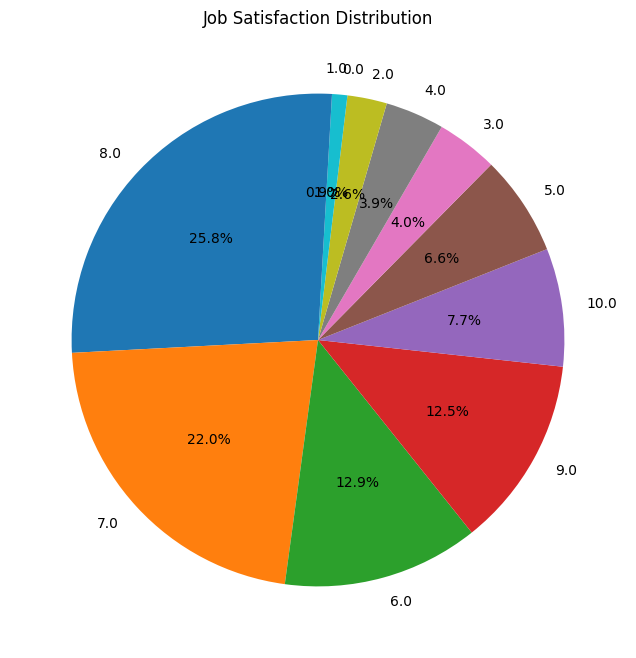

/tmp/ipykernel_581/3939106188.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='JobSatScore', fill=True, color='green')


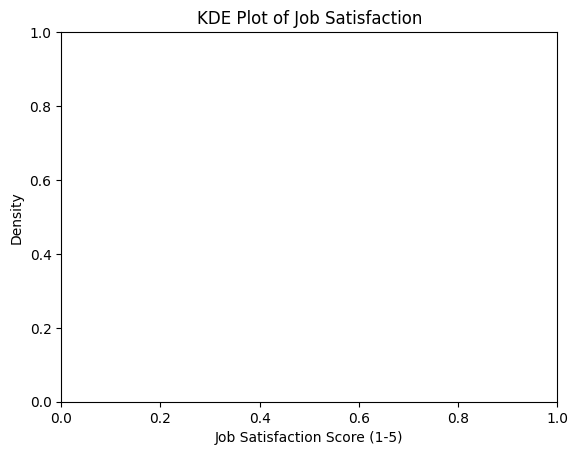

In [7]:
# Pie chart
df['JobSat'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), title='Job Satisfaction Distribution')
plt.ylabel('')
plt.show()

# KDE Plot (numeric mapping)
sat_map = {
    'Very dissatisfied': 1,
    'Dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Satisfied': 4,
    'Very satisfied': 5
}
df['JobSatScore'] = df['JobSat'].map(sat_map)

sns.kdeplot(data=df, x='JobSatScore', fill=True, color='green')
plt.title('KDE Plot of Job Satisfaction')
plt.xlabel('Job Satisfaction Score (1-5)')
plt.show()



### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


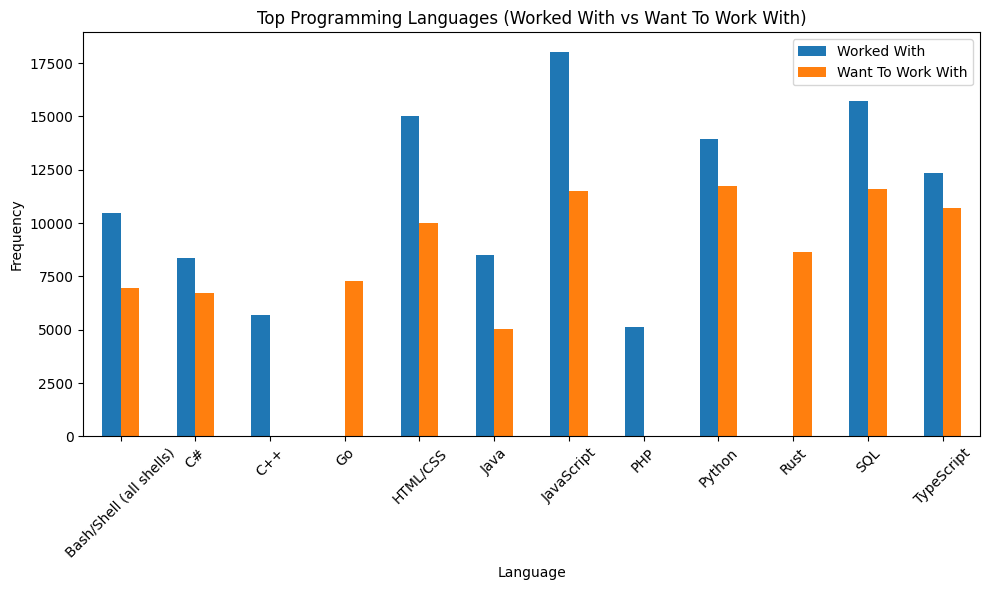

In [8]:
## Write your code here
# Split and explode language columns
langs_worked = df[['LanguageHaveWorkedWith']].dropna().assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
langs_wanted = df[['LanguageWantToWorkWith']].dropna().assign(Language=df['LanguageWantToWorkWith'].str.split(';')).explode('Language')

# Frequency count
top_worked = langs_worked['Language'].value_counts().head(10)
top_wanted = langs_wanted['Language'].value_counts().head(10)

# Combine for grouped bar chart
lang_df = pd.DataFrame({
    'Worked With': top_worked,
    'Want To Work With': top_wanted
}).fillna(0)

# Plot
lang_df.plot(kind='bar', figsize=(10, 6))
plt.title('Top Programming Languages (Worked With vs Want To Work With)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


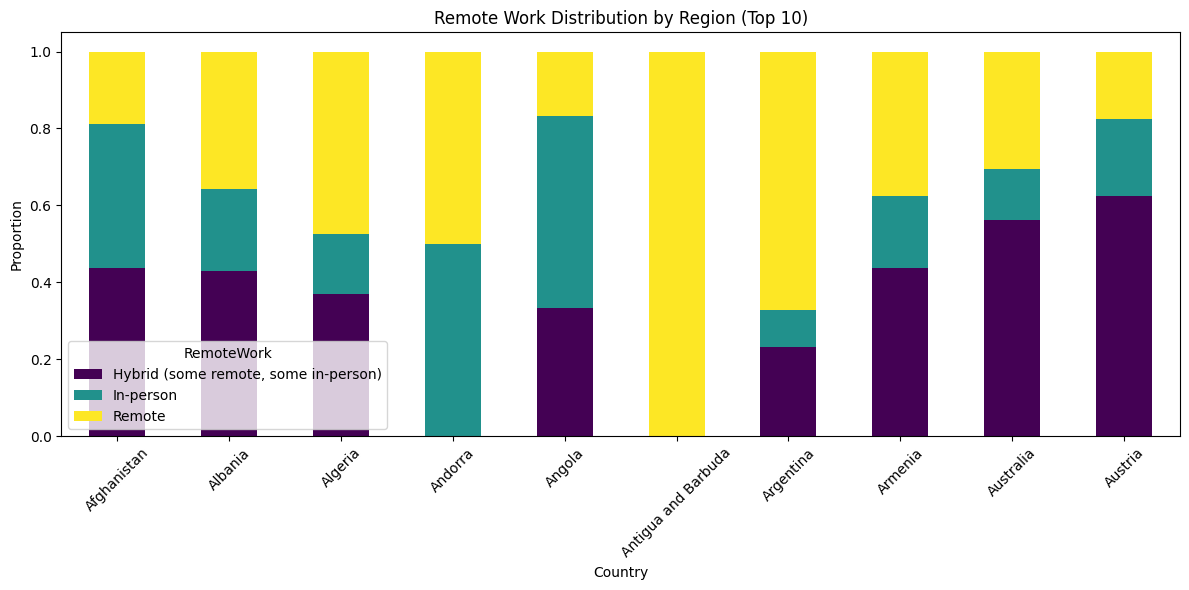

In [9]:
## Write your code here
# Clean Country and RemoteWork
df_remote = df[['Country', 'RemoteWork']].dropna()

# Grouped bar chart
remote_by_region = pd.crosstab(df_remote['Country'], df_remote['RemoteWork'])
remote_by_region = remote_by_region.div(remote_by_region.sum(axis=1), axis=0).head(10)  # Normalize and limit

# Plot
remote_by_region.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Remote Work Distribution by Region (Top 10)')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Pearson Correlation (Years of Experience vs Job Satisfaction): nan


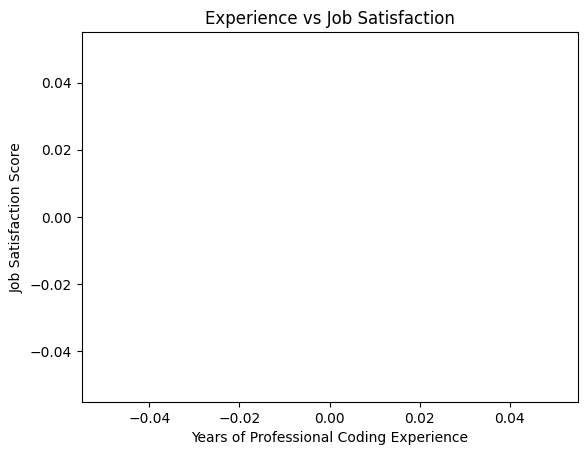

In [10]:
## Write your code here
# Clean YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 0)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 51)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop NaNs in relevant columns
df_corr = df.dropna(subset=['YearsCodePro', 'JobSatScore'])

# Calculate correlation
pearson_corr = df_corr['YearsCodePro'].corr(df_corr['JobSatScore'], method='pearson')
print("Pearson Correlation (Years of Experience vs Job Satisfaction):", pearson_corr)

# Scatter plot
sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatScore', alpha=0.4)
plt.title('Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_581/1410802909.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


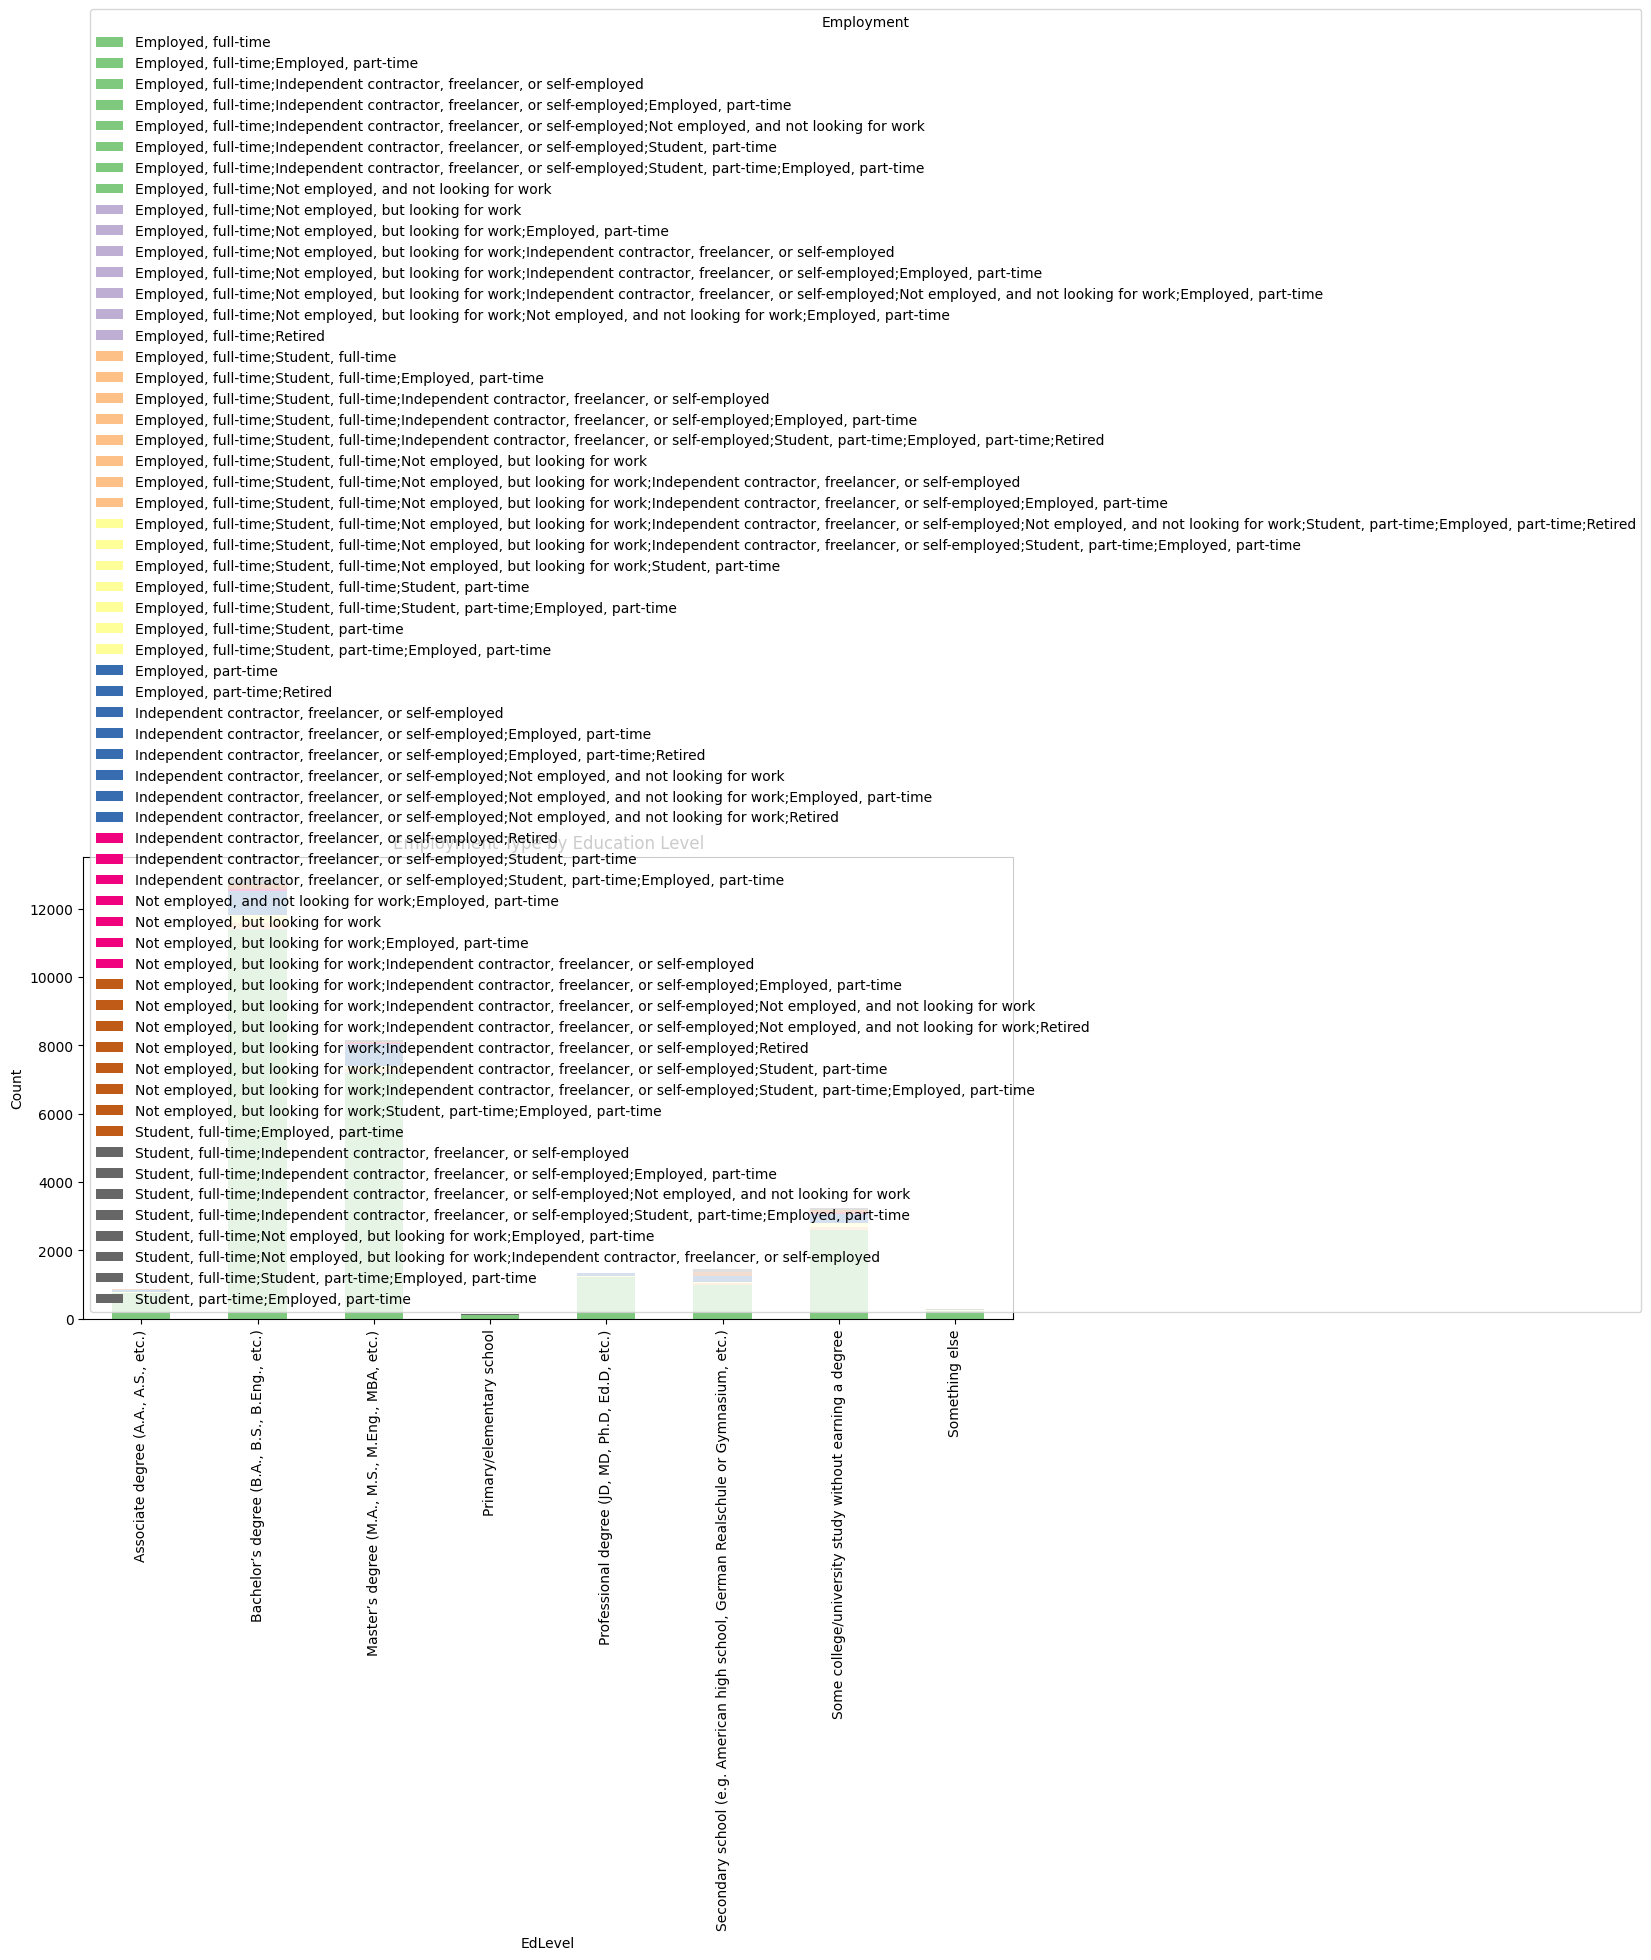

In [11]:
## Write your code here
# Cross-tabulation
edu_emp = pd.crosstab(df['EdLevel'], df['Employment'])

# Plot stacked bar
edu_emp.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Employment Type by Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [12]:
## Write your code here
df.to_csv('cleaned_survey_data_eda.csv', index=False)


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
